# Video Features
In this notebook, we extract facial emotion and compute relationships between the emotions and different labels from the MIT data set, later also with the extracted facial action units with [OpenFace 2.0](https://github.com/TadasBaltrusaitis/OpenFace).

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import seaborn as sns
from google.colab import drive
import statistics
import ast

drive.mount('/content/drive')

Mounted at /content/drive


# Feature Extraction
Download MIT dataset and extract emotions from all videos with the [fer library](https://github.com/justinshenk/fer).

In [ ]:
!pip install fer
from fer import FER
from fer import Video

     |████████████████████████████████| 810 kB 5.3 MB/s 
     |████████████████████████████████| 2.3 MB 51.3 MB/s 


In [ ]:
!wget https://www.dropbox.com/sh/vlnub9pj1vuxgtc/AACl4sQZUvELYsda1Bwmvm4sa/Videos --content-disposition

--2022-01-06 09:26:18--  https://www.dropbox.com/sh/vlnub9pj1vuxgtc/AACl4sQZUvELYsda1Bwmvm4sa/Videos
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/vlnub9pj1vuxgtc/AACl4sQZUvELYsda1Bwmvm4sa/Videos [following]
--2022-01-06 09:26:18--  https://www.dropbox.com/sh/raw/vlnub9pj1vuxgtc/AACl4sQZUvELYsda1Bwmvm4sa/Videos
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf47194fea7c9e74ea37d3b02f5.dl.dropboxusercontent.com/zip_download_get/BArf4L-KApWu_NHwRClMDSOTGabhBQtfgZ9MLVxJtmkFDsB36RU-OXrnDyiEys_w0G6cuh97yXPzwPPr5kluD82_kng00GPweHbdBKH15xftGA# [following]
--2022-01-06 09:26:19--  https://ucf47194fea7c9e74ea37d3b02f5.dl.dropboxusercontent.com/zip_download_get/BArf4L-KApWu_NHwRClMDSOTGabhBQtfgZ9MLVxJtmkFDsB36RU-OXrnDyiEys_w

In [ ]:
!unzip Videos.zip

Archive:  Videos.zip
mapname:  conversion of  failed
 extracting: P3.avi                  
 extracting: P6.avi                  
 extracting: P1.avi                  
 extracting: P8.avi                  
 extracting: P7.avi                  
 extracting: P4.avi                  
 extracting: P5.avi                  
 extracting: P55.avi                 
 extracting: P72.avi                 
 extracting: P27.avi                 
 extracting: P85.avi                 
 extracting: P59.avi                 
 extracting: P43.avi                 
 extracting: P53.avi                 
 extracting: P65.avi                 
 extracting: P57.avi                 
 extracting: PP1.avi                 
 extracting: P34.avi                 
 extracting: P69.avi                 
 extracting: P63.avi                 
 extracting: PP7.avi                 
 extracting: P16.avi                 
 extracting: P22.avi                 
 extracting: P44.avi                 
 extracting: P47.avi               

In [ ]:
mypath = os.getcwd()
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f)) and f.startswith('P')]
if os.path.exists('output.csv'):
  all_emotions = pd.read_csv('output.csv')
else:
  all_emotions = pd.DataFrame()

for f in onlyfiles:
  print(f)
  if f in list(all_emotions['Video']):
    continue
  video = Video(f)
  detector = FER(mtcnn=True)
  raw_data = video.analyze(detector, display=False, save_fps=1, save_frames=False, save_video=False)
  df = video.to_pandas(raw_data)
  df = video.get_first_face(df)
  df = video.get_emotions(df)
  df['Video'] = f
  all_emotions.append(df)

  df.to_csv('output.csv', mode = 'a', header=not os.path.exists('output.csv'))

all_emotions.to_csv('output_all_emotions.csv')

P45.avi
P53.avi
PP25.avi
PP74.avi
P37.avi
P32.avi
PP44.avi
P17.avi
P7.avi
P29.avi
P78.avi
P42.avi
PP56.avi
PP83.avi
PP10.avi
PP29.avi
P22.avi
P20.avi
PP11.avi
P5.avi
P8.avi
PP71.avi
PP35.avi
PP81.avi
P48.avi
P44.avi
P67.avi
PP5.avi
P1.avi
PP33.avi
P27.avi
P11.avi
PP32.avi
P70.avi
P55.avi
PP21.avi
PP57.avi
PP79.avi
P56.avi
P14.avi
P64.avi
PP55.avi
P25.avi
PP58.avi
P79.avi
PP31.avi
P24.avi
P85.avi
PP65.avi
P33.avi
P61.avi
P80.avi
P10.avi
PP24.avi
P63.avi
P12.avi
PP53.avi
PP47.avi
P52.avi
P76.avi
PP63.avi
PP61.avi
P77.avi
PP66.avi
PP70.avi
P81.avi
PP4.avi
PP69.avi
P49.avi
PP48.avi
P69.avi
P34.avi
P86.avi
P13.avi
PP12.avi
06-01-2022:09:31:58,213 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:09:31:58,218 INFO     [classes.py:200] 29.00 fps, 5423 frames, 187.00 seconds


  3%|▎         | 187/5423 [02:42<1:15:49,  1.15frames/s]


PP52.avi
P4.avi
06-01-2022:09:34:41,425 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:09:34:41,425 INFO     [classes.py:200] 29.00 fps, 7627 frames, 263.00 seconds


  3%|▎         | 263/7627 [03:45<1:45:25,  1.16frames/s]


PP1.avi
P15.avi
06-01-2022:09:38:28,88 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:09:38:28,88 INFO     [classes.py:200] 29.00 fps, 13717 frames, 473.00 seconds


  3%|▎         | 473/13717 [06:58<3:15:26,  1.13frames/s]


PP62.avi
P50.avi
PP30.avi
PP64.avi
P30.avi
PP3.avi
06-01-2022:09:45:27,683 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:09:45:27,684 INFO     [classes.py:200] 29.00 fps, 16675 frames, 575.00 seconds


  3%|▎         | 575/16675 [08:30<3:58:20,  1.13frames/s]


P74.avi
PP60.avi
PP67.avi
PP49.avi
06-01-2022:09:53:59,277 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:09:53:59,279 INFO     [classes.py:200] 29.00 fps, 15225 frames, 525.00 seconds


  3%|▎         | 525/15225 [07:46<3:37:51,  1.12frames/s]


PP59.avi
06-01-2022:10:01:46,915 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:01:46,916 INFO     [classes.py:200] 29.00 fps, 7569 frames, 261.00 seconds


  3%|▎         | 261/7569 [03:55<1:49:43,  1.11frames/s]


P43.avi
P66.avi
P73.avi
06-01-2022:10:05:42,786 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:05:42,786 INFO     [classes.py:200] 29.00 fps, 6148 frames, 212.00 seconds


  3%|▎         | 212/6148 [03:04<1:25:57,  1.15frames/s]


PP37.avi
PP76.avi
06-01-2022:10:08:47,759 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:08:47,760 INFO     [classes.py:200] 29.00 fps, 11105 frames, 382.93 seconds


  3%|▎         | 383/11105 [05:31<2:34:29,  1.16frames/s]


PP77.avi
PP13.avi
PP72.avi
P16.avi
P31.avi
P21.avi
06-01-2022:10:14:19,667 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:14:19,667 INFO     [classes.py:200] 29.00 fps, 15515 frames, 535.00 seconds


  3%|▎         | 535/15515 [08:00<3:44:22,  1.11frames/s]


PP80.avi
PP73.avi
06-01-2022:10:22:21,234 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:22:21,234 INFO     [classes.py:200] 29.00 fps, 12382 frames, 426.97 seconds


  3%|▎         | 427/12382 [06:05<2:50:19,  1.17frames/s]


PP16.avi
P47.avi
P71.avi
06-01-2022:10:28:27,44 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:28:27,44 INFO     [classes.py:200] 29.00 fps, 6235 frames, 215.00 seconds


  3%|▎         | 215/6235 [03:14<1:30:58,  1.10frames/s]


P59.avi
06-01-2022:10:31:42,763 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:31:42,764 INFO     [classes.py:200] 29.00 fps, 5365 frames, 185.00 seconds


  3%|▎         | 185/5365 [02:44<1:16:51,  1.12frames/s]


P89.avi
PP15.avi
06-01-2022:10:34:28,238 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:34:28,239 INFO     [classes.py:200] 29.00 fps, 14761 frames, 509.00 seconds


  3%|▎         | 509/14761 [07:33<3:31:35,  1.12frames/s]


PP85.avi
P83.avi
06-01-2022:10:42:02,477 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:42:02,477 INFO     [classes.py:200] 29.00 fps, 4814 frames, 166.00 seconds


  3%|▎         | 166/4814 [02:29<1:09:58,  1.11frames/s]


PP78.avi
06-01-2022:10:44:33,196 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:44:33,197 INFO     [classes.py:200] 29.00 fps, 9784 frames, 337.38 seconds


  3%|▎         | 338/9784 [05:06<2:22:57,  1.10frames/s]


PP84.avi
PP86.avi
06-01-2022:10:49:40,890 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:49:40,891 INFO     [classes.py:200] 29.00 fps, 17578 frames, 606.14 seconds


  3%|▎         | 607/17578 [09:12<4:17:33,  1.10frames/s]


P3.avi
PP6.avi
06-01-2022:10:58:54,424 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:10:58:54,424 INFO     [classes.py:200] 29.00 fps, 15138 frames, 522.00 seconds


  3%|▎         | 522/15138 [08:06<3:47:02,  1.07frames/s]


PP89.avi
P65.avi
P35.avi
06-01-2022:11:07:01,735 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:07:01,735 INFO     [classes.py:200] 29.00 fps, 7105 frames, 245.00 seconds


  3%|▎         | 245/7105 [03:34<1:40:10,  1.14frames/s]


PP14.avi
06-01-2022:11:10:37,137 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:10:37,138 INFO     [classes.py:200] 29.00 fps, 7105 frames, 245.00 seconds


  3%|▎         | 245/7105 [03:41<1:43:16,  1.11frames/s]


PP27.avi
P72.avi
06-01-2022:11:14:19,214 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:14:19,215 INFO     [classes.py:200] 29.00 fps, 4495 frames, 155.00 seconds


  3%|▎         | 155/4495 [02:22<1:06:41,  1.08frames/s]


PP7.avi
PP45.avi
P57.avi
06-01-2022:11:16:42,894 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:16:42,894 INFO     [classes.py:200] 29.00 fps, 9396 frames, 324.00 seconds


  3%|▎         | 324/9396 [05:04<2:21:56,  1.07frames/s]


PP17.avi
P62.avi
P58.avi
PP8.avi
06-01-2022:11:21:47,855 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:21:47,856 INFO     [classes.py:200] 29.00 fps, 9048 frames, 312.00 seconds


  3%|▎         | 312/9048 [04:47<2:14:23,  1.08frames/s]


PP42.avi
06-01-2022:11:26:36,604 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:26:36,605 INFO     [classes.py:200] 29.00 fps, 8352 frames, 288.00 seconds


  3%|▎         | 288/8352 [04:21<2:02:02,  1.10frames/s]


PP50.avi
06-01-2022:11:30:58,894 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:30:58,895 INFO     [classes.py:200] 29.00 fps, 8729 frames, 301.00 seconds


  3%|▎         | 301/8729 [04:33<2:07:35,  1.10frames/s]


PP22.avi
P6.avi
06-01-2022:11:35:33,87 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:35:33,88 INFO     [classes.py:200] 29.00 fps, 12673 frames, 437.00 seconds


  3%|▎         | 437/12673 [06:41<3:07:27,  1.09frames/s]


PP43.avi
PP20.avi
06-01-2022:11:42:15,640 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:42:15,641 INFO     [classes.py:200] 29.00 fps, 6612 frames, 228.00 seconds


  3%|▎         | 228/6612 [03:40<1:42:52,  1.03frames/s]


PP34.avi
P84.avi
06-01-2022:11:45:56,903 INFO     [classes.py:197] Saving every 29.0 frames
06-01-2022:11:45:56,904 INFO     [classes.py:200] 29.00 fps, 9715 frames, 335.00 seconds


  3%|▎         | 335/9715 [05:03<2:21:40,  1.10frames/s]


P60.avi


# Analysis - Emotion with MIT Labels
In this section, we try to analysis the correlation between the emotions and the MIT labels, especially the 'Recommended Hiring' score.


In [ ]:
all_emotions = pd.read_csv('/content/drive/My Drive/XAI/output.csv')
recommend_hiring = pd.read_csv('/content/drive/My Drive/XAI/turker_scores_full_interview.csv')
recommend_hiring = recommend_hiring[['Participant', 'Worker', 'RecommendHiring']]
all_emotions.rename(columns = {'Video':'Participant'}, inplace = True)
all_emotions['Participant'] = all_emotions['Participant'].apply(lambda x: x.split('.')[0].lower())

In [ ]:
recommend_hiring = recommend_hiring[recommend_hiring['Worker'] == 'AGGR']
recommend_hiring = recommend_hiring.drop(columns=['Worker'])
recommend_hiring = recommend_hiring.set_index('Participant')

## 1st Approach: Average of the value
In the approach, we use the average of the values for the emotion

In [ ]:
averaged_emotions = all_emotions
averaged_emotions = averaged_emotions.groupby(['Participant']).mean()
averaged_emotions

,Unnamed: 0,angry,disgust,fear,happy,sad,surprise,neutral
Participant,,,,,,,,
p1,93.5,0.070000,0.001170,0.038723,0.221915,0.234362,0.041117,0.392553
p10,203.5,0.028088,0.000147,0.079118,0.107770,0.364975,0.009657,0.409044
p11,135.5,0.180221,0.006765,0.180221,0.114669,0.097574,0.044265,0.375588
p12,101.5,0.024559,0.001373,0.022794,0.415147,0.061667,0.014706,0.458578
p13,146.5,0.094422,0.000034,0.069660,0.553776,0.064014,0.063061,0.154150
...,...,...,...,...,...,...,...,...
pp83,199.0,0.030677,0.003960,0.068296,0.357343,0.213734,0.011729,0.312682
pp84,263.5,0.137064,0.000284,0.029413,0.474451,0.076155,0.039072,0.242273
pp85,301.5,0.080414,0.003411,0.070513,0.198493,0.144503,0.012318,0.489305


In [ ]:
joined_data = averaged_emotions.join(recommend_hiring)

### Linear Regression

In [ ]:
X = joined_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]  # values converts it into a numpy array
Y = joined_data['RecommendHiring']  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(linear_regressor.coef_)

[-76.1368207  -85.06547082 -78.12845302 -76.24817404 -75.63370006
 -74.68095143 -76.69041019]


### Distibution graph

In [ ]:
good_interviews = joined_data[joined_data['RecommendHiring'].rank(pct=True) > 0.75]
good_interviews['RecommendHiringBool'] = 'yes'
bad_interviews = joined_data[joined_data['RecommendHiring'].rank(pct=True) <= 0.25]
bad_interviews['RecommendHiringBool'] = 'no'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
joined_data_extreme = pd.concat([good_interviews, bad_interviews])
joined_data_extreme

,Unnamed: 0,angry,disgust,fear,happy,sad,surprise,neutral,RecommendHiring,RecommendHiringBool
Participant,,,,,,,,,,
p14,121.5,0.056025,0.001598,0.114180,0.154344,0.286680,0.046844,0.338607,5.920493,yes
p24,181.5,0.019231,0.000165,0.013242,0.458104,0.080852,0.018489,0.408654,6.015717,yes
p32,170.0,0.202727,0.001232,0.060762,0.339736,0.028123,0.276129,0.089912,6.148856,yes
p34,197.0,0.091620,0.004709,0.091747,0.180203,0.293570,0.002101,0.334000,5.564760,yes
p43,66.5,0.211642,0.001045,0.207463,0.036493,0.401866,0.058284,0.081791,5.621657,yes
...,...,...,...,...,...,...,...,...,...,...
pp56,116.5,0.169701,0.000128,0.195983,0.186880,0.117991,0.146111,0.183248,4.168089,no
pp6,260.0,0.110921,0.000230,0.095163,0.020979,0.363321,0.029213,0.378656,3.892621,no
pp69,156.5,0.029968,0.000000,0.012643,0.019586,0.131338,0.004045,0.800860,3.295559,no


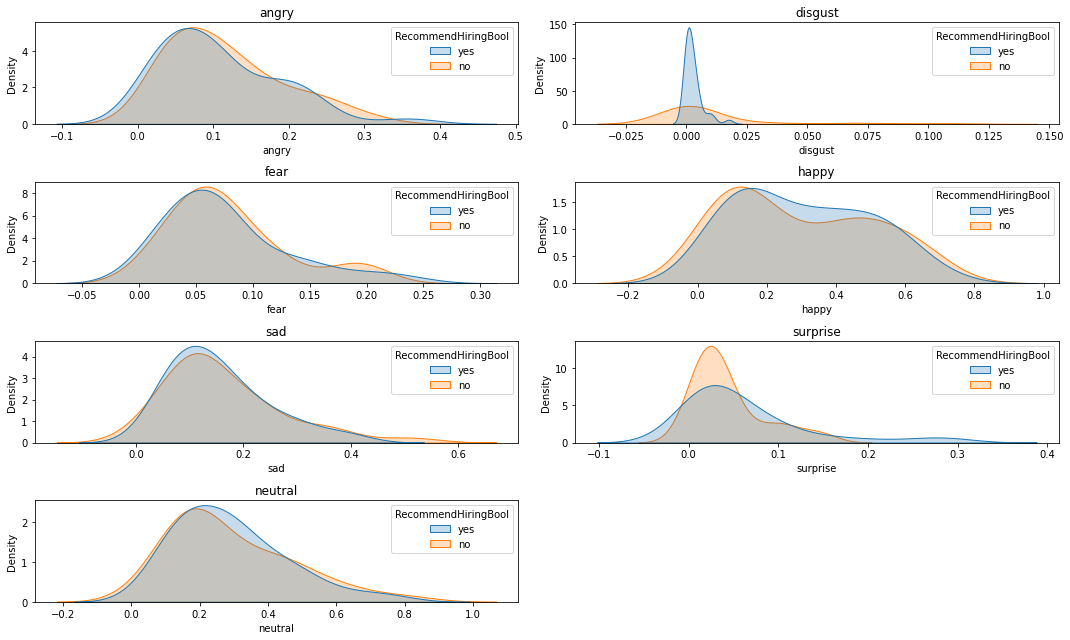

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 9))
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='angry', fill=True, ax=axes[0, 0], common_norm=False).set(title='angry')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='disgust', fill=True, ax=axes[0, 1], common_norm=False).set(title='disgust')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='fear', fill=True, ax=axes[1, 0], common_norm=False).set(title='fear')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='happy', fill=True, ax=axes[1, 1], common_norm=False).set(title='happy')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='sad', fill=True, ax=axes[2, 0], common_norm=False).set(title='sad')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='surprise', fill=True, ax=axes[2, 1], common_norm=False).set(title='surprise')
sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='neutral', fill=True, ax=axes[3, 0], common_norm=False).set(title='neutral')
plt.delaxes(ax=axes[3, 1])
plt.tight_layout()

In [ ]:
np.random.seed(44)

random_bad_interview = bad_interviews.sample()
random_good_interview = good_interviews.sample()
random_bad_interview

,Unnamed: 0,angry,disgust,fear,happy,sad,surprise,neutral,RecommendHiring,RecommendHiringBool
Participant,,,,,,,,,,
p61,65.5,0.261212,0.033182,0.040303,0.432803,0.084318,0.019394,0.127727,3.59748,no


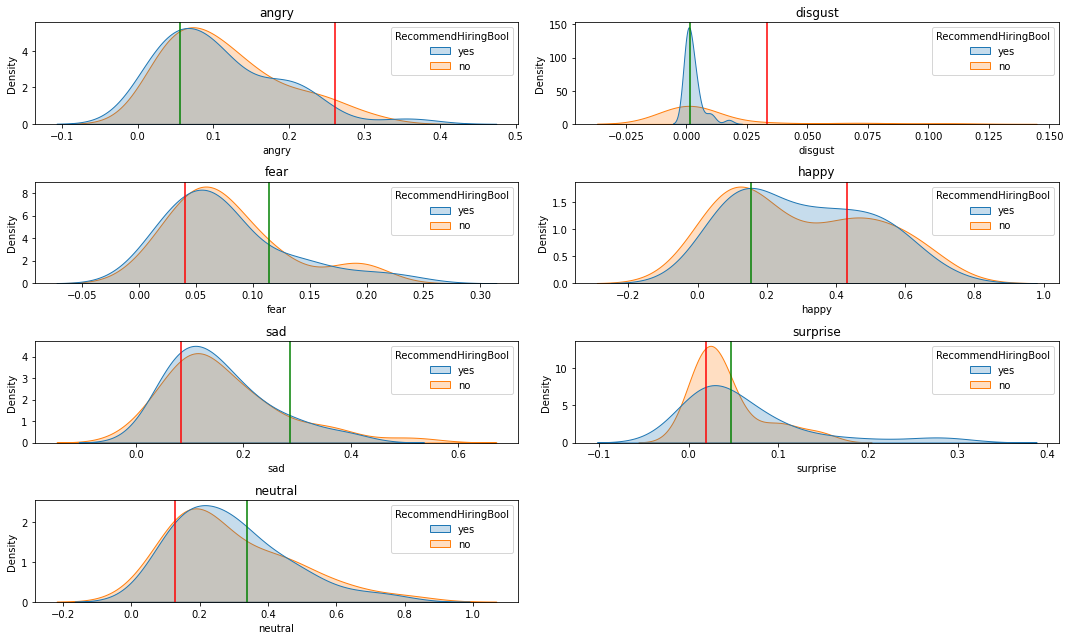

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 9))

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='angry', fill=True, ax=axes[0, 0], common_norm=False).set(title='angry')
axes[0, 0].axvline(random_bad_interview['angry'].iloc[0], color='red')
axes[0, 0].axvline(random_good_interview['angry'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='disgust', fill=True, ax=axes[0, 1], common_norm=False).set(title='disgust')
axes[0, 1].axvline(random_bad_interview['disgust'].iloc[0], color='red')
axes[0, 1].axvline(random_good_interview['disgust'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='fear', fill=True, ax=axes[1, 0], common_norm=False).set(title='fear')
axes[1, 0].axvline(random_bad_interview['fear'].iloc[0], color='red')
axes[1, 0].axvline(random_good_interview['fear'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='happy', fill=True, ax=axes[1, 1], common_norm=False).set(title='happy')
axes[1, 1].axvline(random_bad_interview['happy'].iloc[0], color='red')
axes[1, 1].axvline(random_good_interview['happy'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='sad', fill=True, ax=axes[2, 0], common_norm=False).set(title='sad')
axes[2, 0].axvline(random_bad_interview['sad'].iloc[0], color='red')
axes[2, 0].axvline(random_good_interview['sad'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='surprise', fill=True, ax=axes[2, 1], common_norm=False).set(title='surprise')
axes[2, 1].axvline(random_bad_interview['surprise'].iloc[0], color='red')
axes[2, 1].axvline(random_good_interview['surprise'].iloc[0], color='green')

sns.kdeplot(data=joined_data_extreme, hue='RecommendHiringBool', x='neutral', fill=True, ax=axes[3, 0], common_norm=False).set(title='neutral')
axes[3, 0].axvline(random_bad_interview['neutral'].iloc[0], color='red')
axes[3, 0].axvline(random_good_interview['neutral'].iloc[0], color='green')

plt.delaxes(ax=axes[3, 1])
plt.tight_layout()



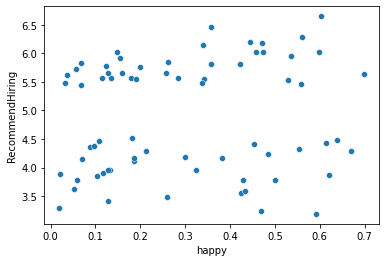

In [ ]:
sns.scatterplot(data=joined_data_extreme, x="happy", y="RecommendHiring")

## 2nd Approach: Percentage of total time

In [ ]:
all_emotions = all_emotions.drop(columns=['Unnamed: 0'])

In [ ]:
max_emotions = pd.DataFrame(all_emotions.set_index('Participant').idxmax(axis=1))
max_emotions.rename(columns = {0:'Emotion'}, inplace = True)

In [ ]:
max_emotions_count = max_emotions.groupby(['Participant', 'Emotion']).size().reset_index().rename(columns = {0:'Emotion_count'})
total_count = max_emotions.groupby(['Participant']).size().reset_index().rename(columns = {0:'total_count'})
joined_emotion = max_emotions_count.set_index('Participant').join(total_count.set_index('Participant'))

In [ ]:
joined_emotion['emotion_percentage'] = joined_emotion['Emotion_count'] / joined_emotion['total_count']

In [ ]:
joined_data_all = joined_emotion.set_index('Emotion', append=True).unstack(level=1)['emotion_percentage'].join(recommend_hiring)
joined_data_all.fillna(0, inplace=True)

### Linear Regression

In [ ]:
X = joined_data_all[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]  # values converts it into a numpy array
Y = joined_data_all['RecommendHiring']  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
print(linear_regressor.coef_)

[ 1.35028682 -9.7655808   0.55708613  1.62947338  1.73584084  2.92979123
  1.5631024 ]


In [ ]:
test_p = pd.DataFrame.from_dict({'angry': [0], 'disgust': [0], 'fear': [0], 'happy': [0], 'sad': [0], 'surprise': [1], 'neutral': [0]})

In [ ]:
test_pred = linear_regressor.predict(test_p)  # make predictions
test_pred

array([6.29442071])

###Corr and p-value


In [ ]:
corr_list = {}
n = joined_data_all.shape[0]
for sentiment in ['angry', 'neutral', 'disgust', 'fear', 'happy', 'sad', 'surprise']:
  s_arr = np.zeros(n)
  for i in range(n):
    s_arr[i] = (joined_data_all[sentiment].iloc[i])
  corr_list[sentiment] = s_arr
import scipy

corr_values = {}
for sentiment in ['angry', 'neutral', 'disgust', 'fear', 'happy', 'sad', 'surprise']:
  data1 = corr_list[sentiment]
  df2 = joined_data_all['RecommendHiring']
  df1 = pd.DataFrame(data1,columns=['value'])


  corr_values[sentiment] = scipy.stats.pearsonr(df2.values, df1.values.reshape(1,-1)[0])
corr_values

{'angry': (-0.052174249806935746, 0.5433547406423272),
 'disgust': (-0.19182264534559115, 0.024203580692442262),
 'fear': (-0.05864080843493283, 0.4944831162546549),
 'happy': (0.02186351972002653, 0.7990842430671998),
 'neutral': (-0.01072475096614947, 0.900646332867985),
 'sad': (-0.005969282037984396, 0.944602803591095),
 'surprise': (0.12657745342324705, 0.13903869916182246)}

### Distribution Graph

In [ ]:
joined_data_all['RecommendHiringBool'] = joined_data_all['RecommendHiring'].rank(pct=True) >= 0.8
joined_data_all

,angry,disgust,fear,happy,neutral,sad,surprise,RecommendHiring,RecommendHiringBool
Participant,,,,,,,,,
p1,0.021277,0.000000,0.000000,0.218085,0.446809,0.308511,0.005319,5.106224,False
p10,0.000000,0.000000,0.000000,0.085784,0.480392,0.433824,0.000000,4.459355,False
p11,0.180147,0.000000,0.161765,0.091912,0.525735,0.029412,0.011029,4.532804,False
p12,0.004902,0.000000,0.009804,0.392157,0.583333,0.009804,0.000000,4.925221,False
p13,0.023810,0.000000,0.020408,0.816327,0.112245,0.000000,0.027211,4.325522,False
...,...,...,...,...,...,...,...,...,...
pp83,0.005013,0.000000,0.012531,0.388471,0.380952,0.210526,0.002506,5.806617,True
pp84,0.117424,0.000000,0.003788,0.564394,0.274621,0.026515,0.013258,6.020304,True
pp85,0.018212,0.001656,0.018212,0.198675,0.650662,0.110927,0.001656,5.766592,True


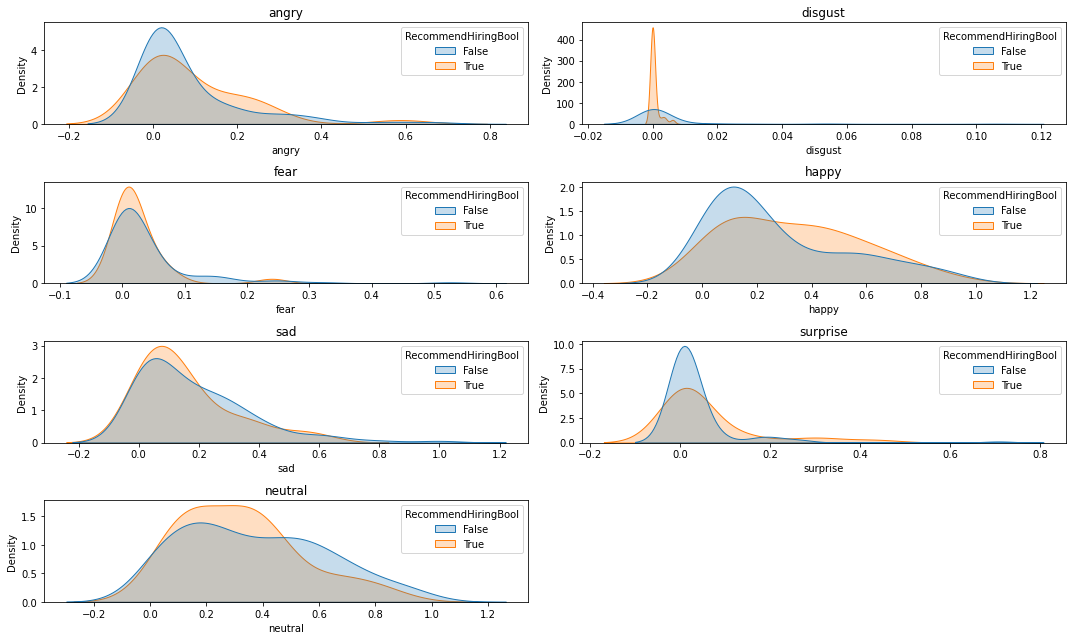

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 9))
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='angry', fill=True, ax=axes[0, 0], common_norm=False).set(title='angry')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='disgust', fill=True, ax=axes[0, 1], common_norm=False).set(title='disgust')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='fear', fill=True, ax=axes[1, 0], common_norm=False).set(title='fear')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='happy', fill=True, ax=axes[1, 1], common_norm=False).set(title='happy')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='sad', fill=True, ax=axes[2, 0], common_norm=False).set(title='sad')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='surprise', fill=True, ax=axes[2, 1], common_norm=False).set(title='surprise')
sns.kdeplot(data=joined_data_all, hue='RecommendHiringBool', x='neutral', fill=True, ax=axes[3, 0], common_norm=False).set(title='neutral')
plt.delaxes(ax=axes[3, 1])
plt.tight_layout()

In [ ]:
hired = joined_data_all[joined_data_all['RecommendHiringBool'] == True]
not_hired = joined_data_all[joined_data_all['RecommendHiringBool'] == False]

Corr and P values for the good interviewees

In [ ]:
corr_list = {}
n = hired.shape[0]
for sentiment in ['angry', 'neutral', 'disgust', 'fear', 'happy', 'sad', 'surprise']:
  s_arr = np.zeros(n)
  for i in range(n):
    s_arr[i] = (hired[sentiment].iloc[i])
  corr_list[sentiment] = s_arr
import scipy

corr_values = {}
for sentiment in ['angry', 'neutral', 'disgust', 'fear', 'happy', 'sad', 'surprise']:
  data1 = corr_list[sentiment]
  df2 = hired['RecommendHiring']
  df1 = pd.DataFrame(data1,columns=['value'])

  corr_values[sentiment] = scipy.stats.pearsonr(df2.values, df1.values.reshape(1,-1)[0])
corr_values

{'angry': (-0.21680112017579348, 0.26779930593717416),
 'disgust': (0.6092764390439276, 0.0005789549425283688),
 'fear': (-0.15694439022545523, 0.42512026168454414),
 'happy': (0.5156076715522117, 0.004981624191555802),
 'neutral': (-0.18460968621216328, 0.3469903689916338),
 'sad': (-0.26973650290149503, 0.16509919402210377),
 'surprise': (-0.08039264490597124, 0.6842559630522492)}

In [ ]:
hired.corr()

,angry,disgust,fear,happy,neutral,sad,surprise,RecommendHiring,RecommendHiringBool
angry,1.000000,-0.227567,0.322703,-0.421599,-0.271371,-0.155520,0.320434,-0.216801,NaN
disgust,-0.227567,1.000000,-0.108544,0.356203,-0.103537,-0.058581,-0.196463,0.609276,NaN
fear,0.322703,-0.108544,1.000000,-0.461849,-0.208490,0.067953,0.502205,-0.156944,NaN
happy,-0.421599,0.356203,-0.461849,1.000000,-0.409235,-0.280423,-0.324133,0.515608,NaN
neutral,-0.271371,-0.103537,-0.208490,-0.409235,1.000000,-0.210640,-0.283359,-0.184610,NaN
sad,-0.155520,-0.058581,0.067953,-0.280423,-0.210640,1.000000,-0.241950,-0.269737,NaN
surprise,0.320434,-0.196463,0.502205,-0.324133,-0.283359,-0.241950,1.000000,-0.080393,NaN
RecommendHiring,-0.216801,0.609276,-0.156944,0.515608,-0.184610,-0.269737,-0.080393,1.000000,NaN
RecommendHiringBool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
not_hired.corr()

,angry,disgust,fear,happy,neutral,sad,surprise,RecommendHiring,RecommendHiringBool
angry,1.000000,0.121067,0.028535,-0.257305,-0.236570,-0.109547,0.072873,-0.050372,NaN
disgust,0.121067,1.000000,0.020151,-0.083293,-0.057393,0.025129,-0.004850,-0.171223,NaN
fear,0.028535,0.020151,1.000000,-0.167080,-0.273391,0.013054,0.297904,0.011910,NaN
happy,-0.257305,-0.083293,-0.167080,1.000000,-0.496506,-0.376168,-0.161209,-0.147870,NaN
neutral,-0.236570,-0.057393,-0.273391,-0.496506,1.000000,-0.260513,-0.163494,0.059978,NaN
sad,-0.109547,0.025129,0.013054,-0.376168,-0.260513,1.000000,-0.201236,0.106919,NaN
surprise,0.072873,-0.004850,0.297904,-0.161209,-0.163494,-0.201236,1.000000,0.124921,NaN
RecommendHiring,-0.050372,-0.171223,0.011910,-0.147870,0.059978,0.106919,0.124921,1.000000,NaN
RecommendHiringBool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hired.mean() - not_hired.mean()

angry                  0.012638
disgust               -0.002803
fear                  -0.014251
happy                  0.058155
neutral               -0.051033
sad                   -0.028162
surprise               0.025454
RecommendHiring        1.185184
RecommendHiringBool    1.000000
dtype: float64

In [ ]:
hired.median() - not_hired.median()

angry                  0.001373
disgust                0.000000
fear                   0.000878
happy                  0.164039
neutral               -0.011325
sad                   -0.019508
surprise               0.001307
RecommendHiring        1.014600
RecommendHiringBool    1.000000
dtype: float64

### Distribution graph for the demo video

In [ ]:
demo_emotions = pd.read_csv('/content/drive/My Drive/XAI/video_emotions.csv')

In [ ]:
max_demo_emotions = pd.DataFrame(demo_emotions.idxmax(axis=1))
max_demo_emotions.rename(columns = {0:'Emotion'}, inplace = True)
max_demo_emotions_count = max_demo_emotions.groupby('Emotion').size().reset_index().rename(columns = {0:'Emotion_count'})
max_demo_emotions_count['Emotion_count'] = max_demo_emotions_count['Emotion_count'] / len(demo_emotions)
emo_dict = {}
max_demo_emotions_count.apply(lambda x: emo_dict.update({x[0]:x[1]}), axis=1)

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
joined_data_all['RecommendHiring'] = joined_data_all.apply(lambda x: 'yes' if x[8] else 'no',axis=1)

In [ ]:
mean = joined_data_all[joined_data_all['RecommendHiring'] == 'yes'][emotions].aggregate(statistics.mean)
stdev = joined_data_all[joined_data_all['RecommendHiring'] == 'yes'][emotions].aggregate(statistics.stdev)
mean_stdev = pd.concat({'mean': mean, 'stdev': stdev}, axis=1)

In [ ]:
def stdev_lines(emotion):
  return [mean_stdev.loc[emotion, 'mean'] + mean_stdev.loc[emotion, 'stdev'], mean_stdev.loc[emotion, 'mean'] - mean_stdev.loc[emotion, 'stdev']]

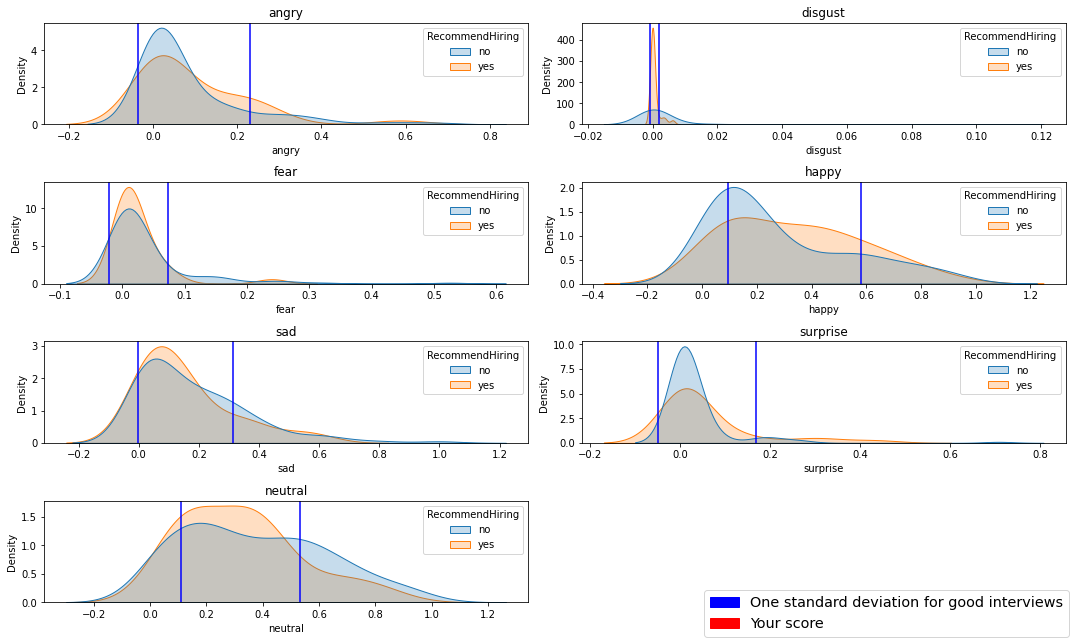

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 9))
x = 0
y = 0
for emotion in emotions:
  if not emotion in emo_dict.keys():
    emo_dict[emotion] = 0
  sns.kdeplot(data=joined_data_all, hue='RecommendHiring', x=emotion, fill=True, ax=axes[x, y], common_norm=False).set(title=emotion)
  axes[x, y].axvline(emo_dict[emotion], color='red')
  axes[x, y].axvline(stdev_lines(emotion)[0], color='blue')
  axes[x, y].axvline(stdev_lines(emotion)[1], color='blue')
  if y == 0: 
    y = 1
  else:
    y = 0
    x += 1

plt.delaxes(ax=axes[3, 1])
plt.tight_layout()

red_patch = mpatches.Patch(color='red', label='Your score')
green_patch = mpatches.Patch(color='blue', label='One standard deviation for good interviews')

fig.legend(handles=[green_patch, red_patch], loc='lower right', fontsize='x-large')

In [ ]:
mean_stdev.to_csv('analysis.csv')

### Aggregate all 3 domains

In [ ]:
audio_analysis = pd.read_csv('/content/drive/My Drive/XAI/audio_analysis.csv')
text_analysis =pd.read_csv('/content/drive/My Drive/XAI/final_page_analysis.csv')

In [ ]:
audio_analysis = audio_analysis[['Participant', 'Sentiments_percentage']]
audio_analysis['Sentiments_percentage'] = audio_analysis['Sentiments_percentage'].apply(ast.literal_eval)
audio_analysis = audio_analysis.join(audio_analysis['Sentiments_percentage'].apply(pd.Series))
audio_analysis = audio_analysis.drop(columns=['Sentiments_percentage'])
audio_analysis = audio_analysis.set_index('Participant')
audio_analysis.rename(columns = {'calm':'neutral'}, inplace = True)

In [ ]:
text_analysis = text_analysis.set_index('Participant')
text_analysis = text_analysis.drop(columns=['combined_filler_nonflu'])

In [ ]:
joined_data_all = joined_data_all.drop(columns=['RecommendHiringBool'])

In [ ]:
all_domain = pd.DataFrame()
all_domain['angry'] = (joined_data_all['angry'] + text_analysis['anger'] + audio_analysis['angry'])/3
all_domain['neutral'] = (joined_data_all['neutral'] + text_analysis['neutral'] + audio_analysis['neutral'])/3
all_domain['disgust'] = (joined_data_all['disgust'] + audio_analysis['disgust'])/2
all_domain['fear'] = (joined_data_all['fear'] + text_analysis['fear'] + audio_analysis['fear'])/3
all_domain['happy'] = (joined_data_all['happy'] + text_analysis['joy'] + audio_analysis['happy'])/3
all_domain['sad'] = (joined_data_all['sad'] + text_analysis['sadness'] + audio_analysis['sad'])/3
all_domain['surprise'] = (joined_data_all['surprise'] + audio_analysis['surprise'])/2
all_domain['RecommendHiring'] = joined_data_all['RecommendHiring']

In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
mean = all_domain[all_domain['RecommendHiring'] == 'yes'][emotions].aggregate(statistics.mean)
stdev = all_domain[all_domain['RecommendHiring'] == 'yes'][emotions].aggregate(statistics.stdev)
mean_stdev = pd.concat({'mean': mean, 'stdev': stdev}, axis=1)

In [ ]:
def stdev_lines(emotion):
  return [mean_stdev.loc[emotion, 'mean'] + mean_stdev.loc[emotion, 'stdev'], mean_stdev.loc[emotion, 'mean'] - mean_stdev.loc[emotion, 'stdev']]

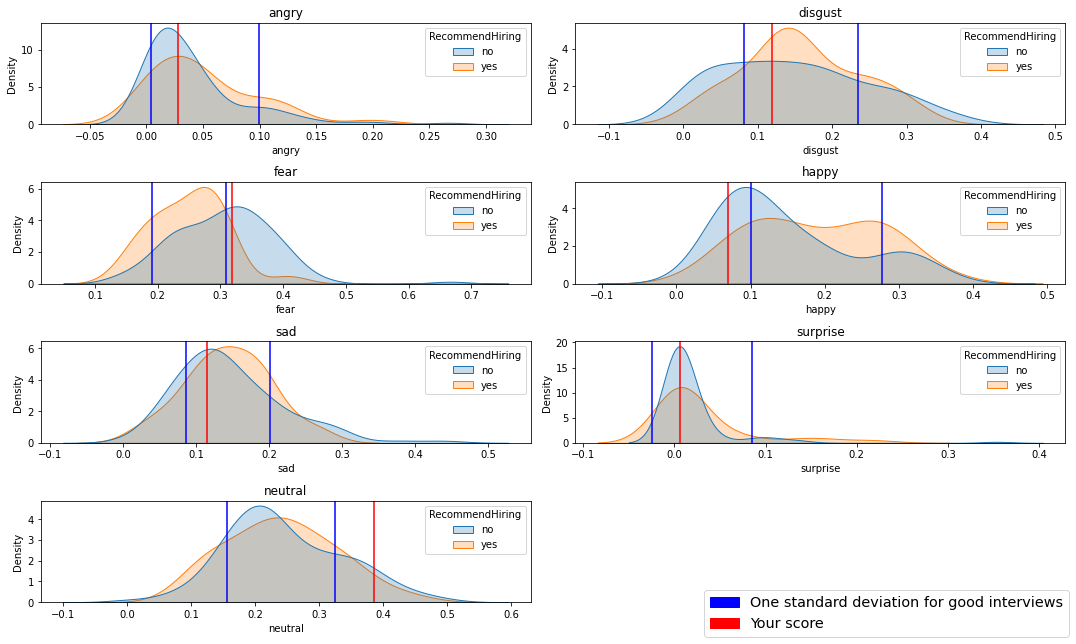

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 9))
x = 0
y = 0
for emotion in emotions:
  emo_dict= all_domain.loc['pp89']
  sns.kdeplot(data=all_domain, hue='RecommendHiring', x=emotion, fill=True, ax=axes[x, y], common_norm=False).set(title=emotion)
  axes[x, y].axvline(emo_dict[emotion], color='red')
  axes[x, y].axvline(stdev_lines(emotion)[0], color='blue')
  axes[x, y].axvline(stdev_lines(emotion)[1], color='blue')
  if y == 0: 
    y = 1
  else:
    y = 0
    x += 1

plt.delaxes(ax=axes[3, 1])
plt.tight_layout()

red_patch = mpatches.Patch(color='red', label='Your score')
green_patch = mpatches.Patch(color='blue', label='One standard deviation for good interviews')

fig.legend(handles=[green_patch, red_patch], loc='lower right', fontsize='x-large')

### Correlation with all labels

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/XAI/turker_scores_full_interview.csv').drop(columns=['Total', 'RecommendHiring']).groupby('Participant').mean()
labels

,Overall,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
Participant,,,,,,,,,,,,,,,,,
p1,5.229732,5.133300,5.554138,5.204389,5.886612,3.457616,5.086559,3.677166,5.225478,5.680047,5.114791,4.789158,5.135108,5.135076,5.884523,5.761051,5.247753
p10,4.672512,4.560788,4.881274,4.338395,4.666603,5.087901,5.102537,2.677818,5.774780,5.761491,4.981911,3.457596,4.144519,4.354291,5.426789,5.882389,4.014022
p11,4.901043,4.683720,4.895785,4.129776,3.562930,4.441268,5.389546,3.124043,4.246231,5.781959,4.342675,4.681447,5.002909,4.976350,5.771778,5.791859,4.444721
p12,5.203853,5.630170,5.547031,5.232253,5.229125,6.554534,5.549608,4.896411,6.436301,5.440597,5.445239,4.231895,5.620263,5.754081,5.646458,6.199189,4.774835
p13,4.325125,4.328864,4.659815,3.257951,4.780335,4.038654,4.271199,3.676952,4.112027,5.884735,2.596797,4.691606,5.546968,5.233775,5.775925,5.693637,3.795360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp83,5.904575,6.434787,6.124322,5.880662,5.784778,6.448303,4.790506,4.583894,6.554928,5.576455,5.780160,4.587848,5.149281,5.239145,6.108363,6.555912,5.684055
pp84,5.671007,5.443720,5.574996,5.430726,5.256500,6.453361,4.940637,5.004777,6.452952,5.691242,5.662549,4.589011,4.811206,5.675067,6.098819,6.224889,5.016995
pp85,5.462607,5.679137,6.437562,5.758483,6.228026,4.905091,4.151364,3.909718,5.997075,5.364375,5.123947,4.591823,4.798510,4.899895,6.655410,6.437285,4.580059


In [ ]:
joined_data_all = joined_data_all.join(labels)

In [ ]:
joined_data_all.corr()

,angry,disgust,fear,happy,neutral,sad,surprise,RecommendHiring,Overall,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
angry,1.000000,0.104626,0.070182,-0.279069,-0.246714,-0.109516,0.140974,-0.052174,-0.005240,-0.131176,-0.007157,-0.063194,0.026248,-0.089986,-0.019989,-0.134741,-0.161961,-0.152605,-0.037801,-0.047563,0.100505,0.107823,0.012976,-0.161186,0.119401
disgust,0.104626,1.000000,0.025870,-0.075592,-0.049231,0.031123,-0.018061,-0.191823,-0.132910,-0.123623,-0.042263,-0.089411,-0.274925,-0.007407,0.067981,-0.236316,-0.020035,-0.081183,-0.076479,-0.172733,-0.070664,-0.058065,-0.183177,-0.156435,-0.139850
fear,0.070182,0.025870,1.000000,-0.194571,-0.270910,0.038480,0.301998,-0.058641,-0.060842,-0.052279,-0.009418,-0.027499,-0.175772,-0.009994,-0.150698,-0.136247,-0.067724,0.031635,-0.027261,-0.055583,-0.103619,-0.132172,-0.062211,-0.126941,-0.047426
happy,-0.279069,-0.075592,-0.194571,1.000000,-0.501843,-0.343802,-0.177840,0.021864,-0.022116,0.201836,-0.005209,0.123372,0.012408,0.437759,0.129006,0.140283,0.388675,0.183423,0.049674,0.009072,-0.302978,-0.190006,-0.031291,0.257810,-0.186970
neutral,-0.246714,-0.049231,-0.270910,-0.501843,1.000000,-0.262775,-0.192869,-0.010725,0.022412,-0.136213,0.013997,-0.054268,0.120659,-0.359904,0.005074,0.032020,-0.261358,-0.102115,0.016228,-0.005897,0.170615,0.095109,-0.001009,-0.100892,0.037316
sad,-0.109516,0.031123,0.038480,-0.343802,-0.262775,1.000000,-0.211259,-0.005969,-0.040147,0.009938,-0.038998,-0.058669,-0.159490,-0.068309,-0.103268,-0.035618,-0.018313,0.058585,-0.042246,0.072872,0.113448,0.065885,0.032837,-0.056577,0.075144
surprise,0.140974,-0.018061,0.301998,-0.177840,-0.192869,-0.211259,1.000000,0.126577,0.154404,0.032303,0.078227,0.044836,0.095073,0.026477,-0.027208,-0.072961,-0.050925,-0.146542,-0.011519,-0.020500,0.102289,0.096476,0.077798,0.020894,0.152072
RecommendHiring,-0.052174,-0.191823,-0.058641,0.021864,-0.010725,-0.005969,0.126577,1.000000,0.939075,0.789507,0.766079,0.756293,0.585653,0.466846,0.285671,0.400207,0.578281,0.062763,0.763220,0.677849,0.302158,0.468579,0.801515,0.534180,0.757699
Overall,-0.005240,-0.132910,-0.060842,-0.022116,0.022412,-0.040147,0.154404,0.939075,1.000000,0.758049,0.781649,0.734087,0.592402,0.445640,0.312439,0.415202,0.542497,0.094577,0.780236,0.670537,0.349170,0.508651,0.822185,0.542441,0.795160
Colleague,-0.131176,-0.123623,-0.052279,0.201836,-0.136213,0.009938,0.032303,0.789507,0.758049,1.000000,0.668364,0.697129,0.408303,0.594900,0.300487,0.299958,0.719927,0.174689,0.687374,0.520738,0.048073,0.233920,0.649805,0.649309,0.555112


### Failed Attempt: NN
We tried to train a neural network to make prediction from the emotions to the score, but coundn't improve the loss during the training.

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [ ]:
joined_data_all = joined_data_all.drop(columns=['Friendly', 'RecommendHiringBool'])

In [ ]:
train = joined_data_all.sample(100)
train_target = train['RecommendHiring']
train = train.drop(columns=['RecommendHiring'])

In [ ]:
test=joined_data_all[~joined_data_all.isin(train)].dropna()
test_target = test['RecommendHiring']
test = test.drop(columns=['RecommendHiring'])
test

,angry,disgust,fear,happy,neutral,sad,surprise
Participant,,,,,,,
p10,0.000000,0.000000,0.000000,0.085784,0.480392,0.433824,0.000000
p13,0.023810,0.000000,0.020408,0.816327,0.112245,0.000000,0.027211
p16,0.036810,0.002045,0.030675,0.271984,0.216769,0.398773,0.042945
p24,0.005495,0.000000,0.000000,0.461538,0.494505,0.032967,0.005495
p3,0.116484,0.000000,0.013187,0.751648,0.081319,0.035165,0.002198
p34,0.022785,0.000000,0.012658,0.179747,0.432911,0.351899,0.000000
p35,0.096154,0.000000,0.000000,0.384615,0.471154,0.038462,0.009615
p43,0.231343,0.000000,0.082090,0.014925,0.052239,0.589552,0.029851
p47,0.120192,0.000000,0.000000,0.490385,0.288462,0.004808,0.096154


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(train, train_target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
1/3 [=========>....................] - ETA: 4s - loss: 4.7685 - mean_absolute_error: 4.7685
Epoch 00001: val_loss improved from inf to 4.80178, saving model to Weights-001--4.80178.hdf5
3/3 [==============================] - 2s 149ms/step - loss: 4.9213 - mean_absolute_error: 4.9213 - val_loss: 4.8018 - val_mean_absolute_error: 4.8018
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 4.8133 - mean_absolute_error: 4.8133
Epoch 00002: val_loss improved from 4.80178 to 4.67756, saving model to Weights-002--4.67756.hdf5
3/3 [==============================] - 0s 36ms/step - loss: 4.8476 - mean_absolute_error: 4.8476 - val_loss: 4.6776 - val_mean_absolute_error: 4.6776
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 4.7036 - mean_absolute_error: 4.7036
Epoch 00003: val_loss improved from 4.67756 to 4.40530, saving model to Weights-003--4.40530.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 4.6884 - mean_absolute_error: 4.6884 

### Intepretation

When looking at the median and the distribution of good and bad interviews for all emotions, we can concluede that happiness is an important emotion for a good interview, followed by not being neutral.

# Facial Action Units
In this section, we want to further investigate the relationship between the facial action units and the emotions, and also with other MIT labels.

## Correlation between facial action units and emotions

In [ ]:
#processed = '/content/drive/My Drive/XAI/processed'
#processedfiles = [f for f in os.listdir(processed) if f.split('.')[1] == 'csv']

In [ ]:
#action_units = pd.DataFrame()
#for f in processedfiles:
#  action_unit = pd.read_csv(processed + '/' + f)
#  action_unit['Participant'] = f.split('.')[0].lower()
#  action_units = action_units.append(action_unit)

In [ ]:
#action_units.to_csv('action_units.csv')

In [ ]:
action_units = pd.read_csv('/content/drive/My Drive/XAI/action_units.csv')
action_units_success = action_units[action_units['success'] == 1] 

In [ ]:
same_length = pd.merge(action_units_success.groupby('Participant').size().reset_index(), all_emotions.groupby('Participant').size().reset_index(), how='inner')

In [ ]:
part_action_units = same_length.set_index('Participant').join(action_units_success.set_index('Participant'))
part_emotions = same_length.set_index('Participant').join(all_emotions.set_index('Participant'))

In [ ]:
part_action_units = part_action_units.drop(columns=[0, 'frame', 'face_id', 'timestamp', 'confidence', 'success'])

In [ ]:
combined_data = pd.concat([part_action_units, part_emotions], axis=1)
combined_data

,Unnamed: 0,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,0,angry,disgust,fear,happy,sad,surprise,neutral
Participant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p11,0,0.00,0.00,0.71,0.00,1.13,0.68,0.00,0.59,1.43,0.53,0.20,0.00,0.00,0.00,0.77,0.00,0.30,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,272,0.45,0.06,0.16,0.17,0.08,0.03,0.05
p11,1,0.01,0.00,0.24,0.00,0.90,0.28,0.05,0.50,1.10,0.32,0.43,0.01,0.55,0.35,0.56,0.17,0.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272,0.13,0.01,0.04,0.27,0.01,0.09,0.44
p11,2,0.13,0.00,0.00,0.21,0.67,0.05,0.05,0.52,0.98,0.36,0.37,0.01,0.55,0.35,0.51,0.17,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,272,0.12,0.00,0.03,0.16,0.02,0.10,0.56
p11,3,0.13,0.00,0.13,0.21,0.83,0.00,0.12,0.84,1.04,0.58,0.14,0.00,0.00,0.00,0.86,0.18,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,272,0.10,0.00,0.09,0.21,0.13,0.01,0.46
p11,4,0.12,0.00,0.15,0.21,1.14,0.22,0.17,0.87,1.30,0.97,0.14,0.00,0.00,0.00,0.74,0.13,0.69,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,272,0.03,0.00,0.03,0.68,0.03,0.13,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp66,427,1.46,0.08,0.24,0.50,0.00,0.00,0.00,0.43,0.02,0.04,0.00,0.10,0.09,0.00,0.81,0.16,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,432,0.57,0.00,0.10,0.00,0.12,0.16,0.04
pp66,428,0.76,0.08,0.13,0.00,0.00,0.19,0.00,0.63,0.02,0.04,0.00,0.19,0.00,0.00,0.57,0.16,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,432,0.38,0.00,0.13,0.08,0.06,0.32,0.03
pp66,429,0.29,0.02,0.21,0.00,0.00,0.31,0.00,0.41,0.00,0.04,0.08,0.32,0.00,0.00,0.54,0.19,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,432,0.21,0.00,0.15,0.01,0.04,0.54,0.04


In [ ]:
combined_data = combined_data.drop(columns=['Unnamed: 0', 0])

In [ ]:
X = combined_data.loc[:, combined_data.columns.str.startswith('AU') & combined_data.columns.str.endswith('c')]
X

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
Participant,,,,,,,,,,,,,,,,,,
p11,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
p11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
p11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
p11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp66,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
pp66,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
pp66,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
combined_data_c = combined_data.loc[:, ~(combined_data.columns.str.startswith('AU') & combined_data.columns.str.endswith('r'))]

In [ ]:
combined_data_c.corr()

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,angry,disgust,fear,happy,sad,surprise,neutral
AU01_c,1.000000,0.513098,-0.014336,0.030407,-0.168932,-0.063655,-0.067608,-0.054202,-0.112788,-0.202537,-0.024572,0.032241,-0.000653,-0.054574,-0.010532,0.091981,0.016533,-0.037387,0.071679,0.032275,0.088421,-0.098691,0.020580,0.079293,0.010582
AU02_c,0.513098,1.000000,-0.008957,0.046320,-0.156805,-0.108102,-0.064911,-0.072102,-0.126212,-0.160355,-0.036183,0.052502,0.084375,-0.030632,-0.071431,0.077352,-0.005196,-0.043104,0.088429,0.039558,0.058509,-0.107399,0.031033,0.051988,0.028554
AU04_c,-0.014336,-0.008957,1.000000,-0.111530,-0.024952,0.115394,0.085053,0.091503,-0.155891,-0.060882,-0.023070,0.005071,-0.053158,-0.118075,-0.026613,-0.013063,-0.010749,0.049884,0.104504,0.169590,0.227714,-0.187859,0.286446,-0.018688,-0.134128
AU05_c,0.030407,0.046320,-0.111530,1.000000,-0.109209,-0.069823,-0.036199,-0.132390,-0.050800,0.020182,0.017449,0.058232,-0.013095,0.093994,-0.041147,0.009330,-0.002731,-0.006014,0.003138,-0.010235,-0.015245,-0.016126,-0.043038,0.011129,0.057874
AU06_c,-0.168932,-0.156805,-0.024952,-0.109209,1.000000,0.404170,0.052965,0.388009,0.549945,0.392134,-0.028234,-0.054690,-0.023314,0.066621,0.173538,-0.039011,-0.011949,-0.033890,-0.261347,-0.074981,-0.275728,0.471852,-0.231568,-0.038508,-0.198857
AU07_c,-0.063655,-0.108102,0.115394,-0.069823,0.404170,1.000000,0.114129,0.427157,0.331430,0.210092,0.003349,-0.056736,-0.036019,-0.023062,0.126601,-0.019902,0.000768,-0.018625,-0.106843,0.108380,-0.184655,0.257155,-0.053200,-0.066835,-0.176981
AU09_c,-0.067608,-0.064911,0.085053,-0.036199,0.052965,0.114129,1.000000,0.127549,0.063049,-0.055603,0.098792,-0.048503,-0.006490,0.020143,0.145594,-0.042835,-0.002558,0.089845,0.085115,0.083152,0.043273,0.089207,-0.055232,-0.026079,-0.148252
AU10_c,-0.054202,-0.072102,0.091503,-0.132390,0.388009,0.427157,0.127549,1.000000,0.441771,0.222557,0.000261,-0.054845,-0.061959,0.125031,0.210284,0.019098,-0.014630,-0.018982,-0.198222,0.106777,-0.226653,0.291638,-0.034602,0.010745,-0.205011
AU12_c,-0.112788,-0.126212,-0.155891,-0.050800,0.549945,0.331430,0.063049,0.441771,1.000000,0.334907,-0.000710,-0.042378,0.002685,0.236693,0.185635,-0.027972,-0.010688,0.007735,-0.242866,-0.070283,-0.303141,0.553431,-0.239179,-0.098502,-0.281184
AU14_c,-0.202537,-0.160355,-0.060882,0.020182,0.392134,0.210092,-0.055603,0.222557,0.334907,1.000000,0.010472,-0.045368,-0.002132,0.108877,0.007560,-0.148939,-0.008708,0.017965,-0.294181,-0.071723,-0.234977,0.295132,-0.073678,-0.041353,-0.074734


In [ ]:
combined_data.corr()['angry']

Unnamed: 0    0.082929
AU01_r        0.063020
AU02_r        0.033826
AU04_r        0.186282
AU05_r        0.024122
AU06_r       -0.298727
AU07_r        0.018802
AU09_r        0.051381
AU10_r       -0.097919
AU12_r       -0.332719
AU14_r       -0.194485
AU15_r        0.088708
AU17_r        0.009053
AU20_r       -0.049305
AU23_r        0.018128
AU25_r       -0.110935
AU26_r        0.035514
AU45_r       -0.026310
AU01_c        0.071679
AU02_c        0.088429
AU04_c        0.104504
AU05_c        0.003138
AU06_c       -0.261347
AU07_c       -0.106843
AU09_c        0.085115
AU10_c       -0.198222
AU12_c       -0.242866
AU14_c       -0.294181
AU15_c        0.041408
AU17_c       -0.042117
AU20_c       -0.001802
AU23_c       -0.098601
AU25_c       -0.055028
AU26_c        0.022052
AU28_c       -0.006159
AU45_c        0.000912
0             0.165478
angry         1.000000
disgust       0.142905
fear          0.306131
happy        -0.393499
sad           0.040867
surprise      0.041522
neutral    

In [ ]:
combined_data_c.corr()['angry']
# 4, (9), 1, 2

AU01_c      0.071679
AU02_c      0.088429
AU04_c      0.104504
AU05_c      0.003138
AU06_c     -0.261347
AU07_c     -0.106843
AU09_c      0.085115
AU10_c     -0.198222
AU12_c     -0.242866
AU14_c     -0.294181
AU15_c      0.041408
AU17_c     -0.042117
AU20_c     -0.001802
AU23_c     -0.098601
AU25_c     -0.055028
AU26_c      0.022052
AU28_c     -0.006159
AU45_c      0.000912
angry       1.000000
disgust     0.142905
fear        0.306131
happy      -0.393499
sad         0.040867
surprise    0.041522
neutral    -0.159258
Name: angry, dtype: float64

In [ ]:
combined_data_c.corr()['disgust']
# 4, (7), (10), (9)

AU01_c      0.032275
AU02_c      0.039558
AU04_c      0.169590
AU05_c     -0.010235
AU06_c     -0.074981
AU07_c      0.108380
AU09_c      0.083152
AU10_c      0.106777
AU12_c     -0.070283
AU14_c     -0.071723
AU15_c     -0.009040
AU17_c     -0.017298
AU20_c     -0.023483
AU23_c     -0.062365
AU25_c     -0.022270
AU26_c      0.019923
AU28_c     -0.003961
AU45_c     -0.021959
angry       0.142905
disgust     1.000000
fear        0.106254
happy      -0.157546
sad         0.096441
surprise   -0.033299
neutral    -0.146090
Name: disgust, dtype: float64

In [ ]:
combined_data_c.corr()['fear']
# 4, 1, 2

AU01_c      0.088421
AU02_c      0.058509
AU04_c      0.227714
AU05_c     -0.015245
AU06_c     -0.275728
AU07_c     -0.184655
AU09_c      0.043273
AU10_c     -0.226653
AU12_c     -0.303141
AU14_c     -0.234977
AU15_c     -0.002222
AU17_c      0.005099
AU20_c     -0.001504
AU23_c     -0.125955
AU25_c     -0.069888
AU26_c      0.045285
AU28_c      0.020779
AU45_c      0.023360
angry       0.306131
disgust     0.106254
fear        1.000000
happy      -0.484285
sad         0.285922
surprise    0.089490
neutral    -0.185737
Name: fear, dtype: float64

In [ ]:
combined_data_c.corr()['happy']
#12,6,(14),(10),(7),25

AU01_c     -0.098691
AU02_c     -0.107399
AU04_c     -0.187859
AU05_c     -0.016126
AU06_c      0.471852
AU07_c      0.257155
AU09_c      0.089207
AU10_c      0.291638
AU12_c      0.553431
AU14_c      0.295132
AU15_c     -0.028229
AU17_c     -0.087055
AU20_c     -0.016708
AU23_c      0.155368
AU25_c      0.243197
AU26_c     -0.027715
AU28_c     -0.010770
AU45_c     -0.022402
angry      -0.393499
disgust    -0.157546
fear       -0.484285
happy       1.000000
sad        -0.541561
surprise   -0.133494
neutral    -0.486270
Name: happy, dtype: float64

In [ ]:
combined_data_c.corr()['neutral']
#17, 5

AU01_c      0.010582
AU02_c      0.028554
AU04_c     -0.134128
AU05_c      0.057874
AU06_c     -0.198857
AU07_c     -0.176981
AU09_c     -0.148252
AU10_c     -0.205011
AU12_c     -0.281184
AU14_c     -0.074734
AU15_c      0.009336
AU17_c      0.117000
AU20_c      0.020447
AU23_c     -0.032491
AU25_c     -0.183116
AU26_c     -0.003535
AU28_c     -0.001200
AU45_c     -0.037718
angry      -0.159258
disgust    -0.146090
fear       -0.185737
happy      -0.486270
sad        -0.114426
surprise   -0.130846
neutral     1.000000
Name: neutral, dtype: float64

In [ ]:
combined_data_c.corr()['sad']
# 4,(45)

AU01_c      0.020580
AU02_c      0.031033
AU04_c      0.286446
AU05_c     -0.043038
AU06_c     -0.231568
AU07_c     -0.053200
AU09_c     -0.055232
AU10_c     -0.034602
AU12_c     -0.239179
AU14_c     -0.073678
AU15_c      0.014103
AU17_c      0.036667
AU20_c      0.020156
AU23_c     -0.056929
AU25_c     -0.124462
AU26_c     -0.001535
AU28_c      0.017347
AU45_c      0.119442
angry       0.040867
disgust     0.096441
fear        0.285922
happy      -0.541561
sad         1.000000
surprise   -0.159765
neutral    -0.114426
Name: sad, dtype: float64

In [ ]:
combined_data.corr()['sad']

Unnamed: 0    0.045940
AU01_r        0.091179
AU02_r        0.058761
AU04_r        0.332674
AU05_r        0.002025
AU06_r       -0.288821
AU07_r       -0.043412
AU09_r       -0.013425
AU10_r       -0.077324
AU12_r       -0.287949
AU14_r       -0.121795
AU15_r        0.064679
AU17_r        0.146180
AU20_r        0.036938
AU23_r       -0.036637
AU25_r       -0.135560
AU26_r        0.045397
AU45_r        0.206452
AU01_c        0.020580
AU02_c        0.031033
AU04_c        0.286446
AU05_c       -0.043038
AU06_c       -0.231568
AU07_c       -0.053200
AU09_c       -0.055232
AU10_c       -0.034602
AU12_c       -0.239179
AU14_c       -0.073678
AU15_c        0.014103
AU17_c        0.036667
AU20_c        0.020156
AU23_c       -0.056929
AU25_c       -0.124462
AU26_c       -0.001535
AU28_c        0.017347
AU45_c        0.119442
0             0.120910
angry         0.040867
disgust       0.096441
fear          0.285922
happy        -0.541561
sad           1.000000
surprise     -0.159765
neutral    

In [ ]:
combined_data_c.corr()['surprise']
# 1, 2

AU01_c      0.079293
AU02_c      0.051988
AU04_c     -0.018688
AU05_c      0.011129
AU06_c     -0.038508
AU07_c     -0.066835
AU09_c     -0.026079
AU10_c      0.010745
AU12_c     -0.098502
AU14_c     -0.041353
AU15_c      0.003448
AU17_c     -0.006775
AU20_c     -0.018176
AU23_c     -0.062593
AU25_c      0.006423
AU26_c      0.022680
AU28_c     -0.006485
AU45_c     -0.074244
angry       0.041522
disgust    -0.033299
fear        0.089490
happy      -0.133494
sad        -0.159765
surprise    1.000000
neutral    -0.130846
Name: surprise, dtype: float64

## Correlation between FAU and other labels

In [ ]:
same_length = pd.merge(action_units_success.groupby('Participant').size().reset_index(), max_emotions.groupby('Participant').size().reset_index(), how='inner')

In [ ]:
part_emotions = same_length.set_index('Participant').join(max_emotions)
part_emotions = part_emotions.drop(columns=[0])

In [ ]:
part_action_units = same_length.set_index('Participant').join(action_units_success.set_index('Participant'))
part_action_units = part_action_units.drop(columns=[0, 'frame', 'face_id', 'timestamp', 'confidence', 'success'])

In [ ]:
combined_data = pd.concat([part_action_units, part_emotions], axis=1)

In [ ]:
combined_data

,Unnamed: 0,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion
Participant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p11,0,0.00,0.00,0.71,0.00,1.13,0.68,0.00,0.59,1.43,0.53,0.20,0.00,0.00,0.00,0.77,0.00,0.30,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,angry
p11,1,0.01,0.00,0.24,0.00,0.90,0.28,0.05,0.50,1.10,0.32,0.43,0.01,0.55,0.35,0.56,0.17,0.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
p11,2,0.13,0.00,0.00,0.21,0.67,0.05,0.05,0.52,0.98,0.36,0.37,0.01,0.55,0.35,0.51,0.17,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,neutral
p11,3,0.13,0.00,0.13,0.21,0.83,0.00,0.12,0.84,1.04,0.58,0.14,0.00,0.00,0.00,0.86,0.18,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,neutral
p11,4,0.12,0.00,0.15,0.21,1.14,0.22,0.17,0.87,1.30,0.97,0.14,0.00,0.00,0.00,0.74,0.13,0.69,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp66,427,1.46,0.08,0.24,0.50,0.00,0.00,0.00,0.43,0.02,0.04,0.00,0.10,0.09,0.00,0.81,0.16,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,angry
pp66,428,0.76,0.08,0.13,0.00,0.00,0.19,0.00,0.63,0.02,0.04,0.00,0.19,0.00,0.00,0.57,0.16,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,angry
pp66,429,0.29,0.02,0.21,0.00,0.00,0.31,0.00,0.41,0.00,0.04,0.08,0.32,0.00,0.00,0.54,0.19,0.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,surprise


In [ ]:
action_units_presence = action_units_success.loc[:, action_units_success.columns.str.startswith('AU') & action_units_success.columns.str.endswith('c') | action_units_success.columns.str.startswith('Participant') ]

In [ ]:
count = action_units_presence.groupby('Participant').size().reset_index().rename(columns = {0:'count'})
sum = action_units_presence.groupby('Participant').sum()
joined_action_units = count.set_index('Participant').join(sum)

In [ ]:
action_units_percentage=joined_action_units.apply(lambda col: col/joined_action_units['count'])

In [ ]:
action_units_percentage = action_units_percentage.drop(columns=['count'])

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/XAI/turker_scores_full_interview.csv').drop(columns=['Total', 'RecommendHiring']).groupby('Participant').mean()
labels

,Overall,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
Participant,,,,,,,,,,,,,,,,,
p1,5.229732,5.133300,5.554138,5.204389,5.886612,3.457616,5.086559,3.677166,5.225478,5.680047,5.114791,4.789158,5.135108,5.135076,5.884523,5.761051,5.247753
p10,4.672512,4.560788,4.881274,4.338395,4.666603,5.087901,5.102537,2.677818,5.774780,5.761491,4.981911,3.457596,4.144519,4.354291,5.426789,5.882389,4.014022
p11,4.901043,4.683720,4.895785,4.129776,3.562930,4.441268,5.389546,3.124043,4.246231,5.781959,4.342675,4.681447,5.002909,4.976350,5.771778,5.791859,4.444721
p12,5.203853,5.630170,5.547031,5.232253,5.229125,6.554534,5.549608,4.896411,6.436301,5.440597,5.445239,4.231895,5.620263,5.754081,5.646458,6.199189,4.774835
p13,4.325125,4.328864,4.659815,3.257951,4.780335,4.038654,4.271199,3.676952,4.112027,5.884735,2.596797,4.691606,5.546968,5.233775,5.775925,5.693637,3.795360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp83,5.904575,6.434787,6.124322,5.880662,5.784778,6.448303,4.790506,4.583894,6.554928,5.576455,5.780160,4.587848,5.149281,5.239145,6.108363,6.555912,5.684055
pp84,5.671007,5.443720,5.574996,5.430726,5.256500,6.453361,4.940637,5.004777,6.452952,5.691242,5.662549,4.589011,4.811206,5.675067,6.098819,6.224889,5.016995
pp85,5.462607,5.679137,6.437562,5.758483,6.228026,4.905091,4.151364,3.909718,5.997075,5.364375,5.123947,4.591823,4.798510,4.899895,6.655410,6.437285,4.580059


In [ ]:
labels = labels.drop(columns=['SpeakingRate', 'NoFillers', 'Paused', 'EngagingTone', 'StructuredAnswers'])

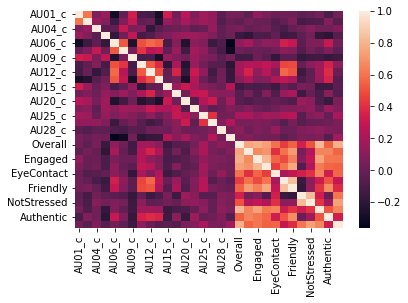

In [ ]:
sns.heatmap(action_units_percentage.join(labels).corr())

In [ ]:
sorted_corr = action_units_percentage.join(labels).corr().unstack().sort_values()

In [ ]:
sorted_corr=sorted_corr.reset_index()

In [ ]:
sorted_corr =sorted_corr[sorted_corr['level_0'].str.startswith('AU') ^ sorted_corr['level_1'].str.startswith('AU')]

In [ ]:
sorted_corr = sorted_corr.drop_duplicates(subset=[0])

In [ ]:
sorted_corr

,level_0,level_1,0
20,Authentic,AU05_c,-0.212317
26,Colleague,AU05_c,-0.191671
28,AU09_c,EyeContact,-0.182417
32,Focused,AU05_c,-0.181701
38,AU09_c,Calm,-0.176633
...,...,...,...
754,AU12_c,Authentic,0.390566
772,Smiled,AU10_c,0.467247
774,Friendly,AU10_c,0.484476
784,Friendly,AU12_c,0.510119


In [ ]:
sorted_corr[sorted_corr['level_0'].isin(['AU04_c'])]

,level_0,level_1,0
182,AU04_c,EyeContact,-0.045332
248,AU04_c,Friendly,-0.008984
338,AU04_c,Excited,0.026217
352,AU04_c,Focused,0.031354
422,AU04_c,Overall,0.056786
484,AU04_c,NotAwkward,0.083058


In [ ]:
sorted_corr[abs(sorted_corr[0])>0.2]

,level_0,level_1,0
20,Authentic,AU05_c,-0.212317
644,Overall,AU25_c,0.202623
648,EyeContact,AU10_c,0.204271
650,AU25_c,NotAwkward,0.205485
652,AU17_c,Friendly,0.206982
658,AU25_c,Colleague,0.219727
660,AU14_c,EyeContact,0.222778
664,AU14_c,Friendly,0.227950
666,Colleague,AU14_c,0.228579
670,AU25_c,Smiled,0.239359


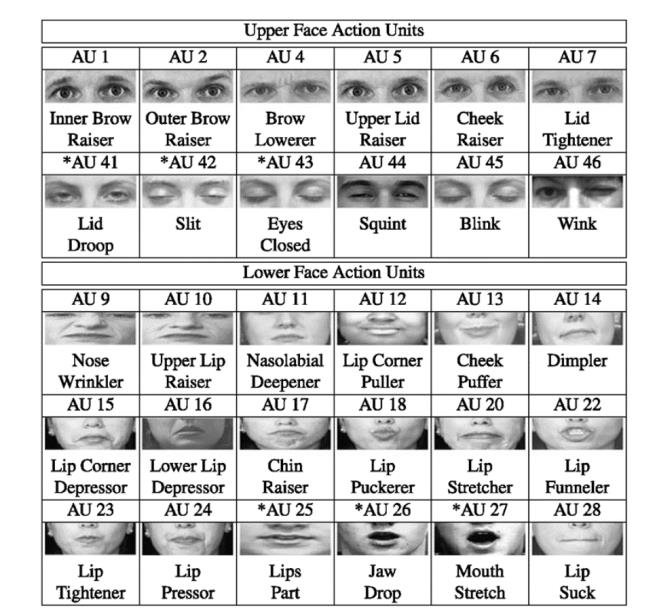

##Intepretation
AU 12, 6, 25 are correlated to happy emotion and at the same time positiv labels such as 'Smiled', 'Friendly' and 'Authentic' => higher score

AU5 is correlated to neutral emotion and negatively correlated to label 'Authentic' => lower score

## Failed Attempt: Classification
We tried to train classification models to predict emotion with the facial action units but couldn't achieve high accuracy.

### NN

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset

X = combined_data.drop(columns=['Emotion'])
Y = combined_data['Emotion']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=35, activation='relu'))
	model.add(Dense(7, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Baseline: 59.26% (1.84%)


###RandomForestClassifier

In [ ]:
#X = combined_data.loc[:, combined_data.columns.str.startswith('AU') & combined_data.columns.str.endswith('r')]
X = combined_data.drop(columns=['Emotion'])
y = combined_data['Emotion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.608355876164713
